# Prediction of future sale  prices of Bulldozer with Machine Learning


## Problem statement:
> Predict the future prices of Bulldozer.Regression Problem.

## Data:
> Data is from kaggle Blue Book for Bulldozer: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

* Train.csv is the training set, which contains data through the end of 2011.
* 
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.* 
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition
## Evaluation:
*The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.* 
 Note: For Regression error should be minimised.Hence our RMSLE  should be minimum.
 
## Features:
Data Dictionary is provided for it as : data/Data Dictionary.xlsx

.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [102]:
df = pd.read_csv("data/TrainAndValid.csv",low_memory=False)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [104]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

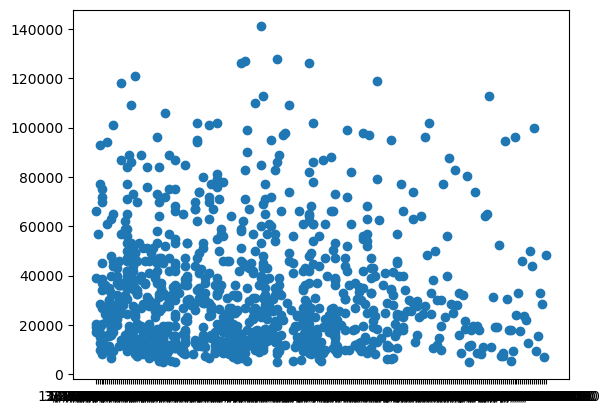

In [105]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: xlabel='Price', ylabel='No. of Bulldozers'>

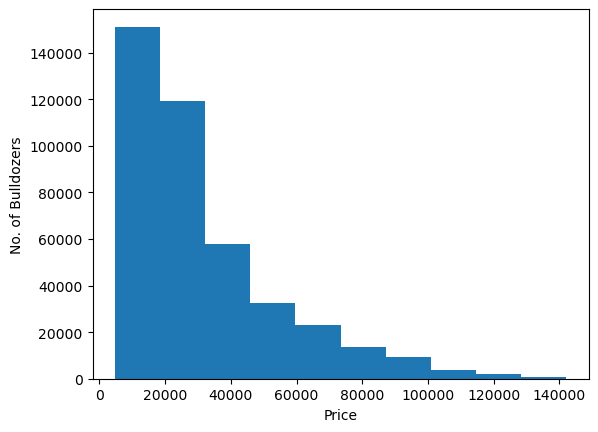

In [106]:
df.SalePrice.plot.hist(xlabel="Price",ylabel= "No. of Bulldozers")

### Parsing dates
when we work with time series data, we want to enrich the time & data component as much as possible.

We can do thatby telling pandas whivh of our columns has dates in it using the `parse_dates` parameter .

In [107]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [108]:
df  = pd.read_csv("data/TrainAndValid.csv", low_memory =False,parse_dates = ['saledate'] )

In [109]:
df.saledate.dtype

dtype('<M8[ns]')

In [110]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

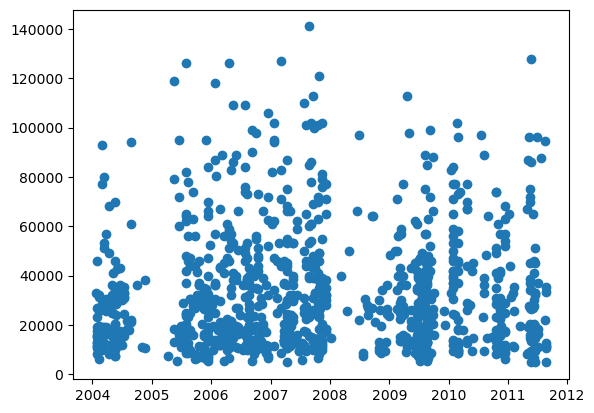

In [111]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<BarContainer object of 1000 artists>

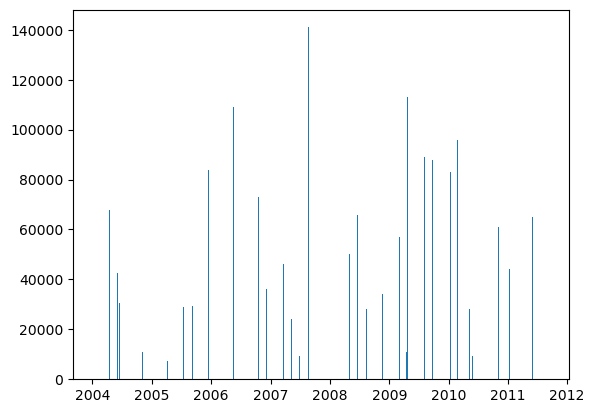

In [112]:
fig,ax = plt.subplots()
ax.bar(df["saledate"][:1000],df["SalePrice"][:1000])

In [113]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort Dataframe by saledate
When working with time series data,it's good idea to sort it by date.

In [115]:
# Sort Dataframe in date order.
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [116]:
### Make a copy of original DataFrame
df_copy = df.copy()

### Feature Engineering

In [117]:
#### Add datetime parameters for `saledate` column
df["saleyear"] = df.saledate.dt.year
df["salemonth"] = df.saledate.dt.month
df["saleday"] = df.saledate.dt.day
df["salemdayofyear"] = df.saledate.dt.dayofyear
df["saledayofweek"] = df.saledate.dt.dayofweek


In [118]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [119]:
# Now we've enriched our DataFrame with date time features , we can remove saledate column.
df.drop("saledate",axis=1,inplace=True)

In [120]:
# Check frequency of values of a columns
df.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [121]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,salemdayofyear,saledayofweek
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,17,1
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31,1
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,31,1
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31,1
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,119,5
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,119,5
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,119,5
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,119,5


## Modelling
Let's do some model drivem EDA.

In [122]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()

In [123]:
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

### Converting object into numbers

In [124]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [125]:
pd.api.types.is_string_dtype(df_copy["UsageBand"])

False

In [126]:
pd.api.types.is_object_dtype(df_copy["UsageBand"])

True

In [127]:
# find the columns whic contains string.
string_columns=[]
for col in df.columns:
    if pd.api.types.is_string_dtype(df[str(col)]) is True:
        string_columns.append(col)

In [128]:
string_columns

['fiModelDesc',
 'fiBaseModel',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc']

In [129]:
# find the columns whic contains string.
object_columns=[]
for col in df.columns:
    if pd.api.types.is_object_dtype(df[str(col)]) is True:
        object_columns.append(col)
object_columns

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [131]:
#Turning object into Category values
# In pandas , category values are treated as number codes undeer the hood.
for label,content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label] = content.astype("category").cat.as_ordered() # also arranging categories alphabetically.


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [133]:
## ascessing the numeric values of categories.
df["state"].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [134]:
df.state

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [138]:
### Save preprocessed Data

df.to_csv("data/train_temp.csv",index=False)  ##while saving the category dtype is changed into object dtype for csv. we can use different format such pickle to avoid this.

In [136]:
dff=pd.read_csv("data/train_temp.csv",low_memory=False)

In [137]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [140]:
df.to_pickle("tain_temp.pkl")

In [147]:
df=pd.read_pickle('tain_temp.pkl')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [145]:
df.isna().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Filling missing values

#### filling the numeric values

In [149]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [153]:
# Fill numeric rows with the median. Median is robust than mean .Since it is the most repeated value.
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the  data was misssing for the row of that colunms
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill the missing value with median
            df[label]=content.fillna(content.median())
            

In [154]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [157]:
df["auctioneerID"].isna().sum()

0

In [162]:
df["auctioneerID_is_missing"].dtype

dtype('bool')

In [165]:
df.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [164]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
salemdayofyear
saledayofweek
auctioneerID_is_missing
MachineHoursCurrentMeter_is_missing


#### filling missing categorical values

In [168]:
# Turn categorical variables into numbers and filling missing
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing values.
        df[label+"_is_missing"] = pd.isnull(content)
        #turn categories into numbers and add +1 because after turning into numbers missing value is -1.
        df[label]=pd.Categorical(content).codes+1

In [169]:
pd.Categorical(df["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [171]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [172]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [173]:
df.to_pickle("tain_temp.pkl")

In [4]:
df=pd.read_pickle('tain_temp.pkl')

In [175]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Fitting the model

In [176]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [177]:
X= df.drop("SalePrice",axis=1)
Y= df["SalePrice"]

In [180]:
%%time
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_jobs=-1 ,random_state= 99)

model.fit(X,Y)

CPU times: total: 26min 53s
Wall time: 7min 44s


RandomForestRegressor(n_jobs=-1, random_state=99)

In [181]:
model.score(X,Y)

0.9876004459598886

In [4]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True


In [5]:
df.saleyear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleyear, Length: 412698, dtype: int32

In [7]:
df.saleyear.value_counts()

saleyear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [5]:
#we have imported the TrainAndValid.csv . Train data set is from 1989 to 2011 And Validation data set is of 2012(jan to April).
# Hence we need to split them.
df_val = df[df.saleyear == 2012]
df_train = df[df.saleyear != 2012]

len(df_val),len(df_train)

(11573, 401125)

In [6]:
#splitting further into X and y.
Xtrain, Ytrain = df_train.drop("SalePrice",axis=1) , df_train.SalePrice
Xval, Yval = df_val.drop("SalePrice",axis=1) ,df_val.SalePrice

In [14]:
Xtrain.shape ,Ytrain.shape  ,Xval.shape, Yval.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building a Evaluation Metrics 
Competition has said RMSLE (Root Mean Squared Log Error).

In [2]:
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import mean_squared_log_error , mean_absolute_error ,r2_score

In [28]:
def rmsle(ytest,ypred):
    return np.sqrt(mean_squared_log_error(ytest,ypred))


In [3]:
def show_metrics(model):
    y_pred_train= model.predict(Xtrain)
    y_pred_val = model.predict(Xval)

    scores={
        "Root Mean Squared Log error for val":root_mean_squared_log_error(Yval,y_pred_val),
        "Root Mean Squared Log error for train":root_mean_squared_log_error(Ytrain,y_pred_train),
        "Mean absolute error for val": mean_absolute_error(Yval,y_pred_val),
        "Mean absolute error for train": mean_absolute_error(Ytrain,y_pred_train),
        "R2_score for Val" : r2_score(Yval,y_pred_val),
        "R2_score for train": r2_score(Ytrain,y_pred_train),
    }

    return scores

In [22]:
%%time
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_jobs=-1 ,random_state= 99)


CPU times: total: 328 ms
Wall time: 2.64 s


### Testing our model on Subset(to tune the hyperparameters)
Since , fitting entire training data takes much longer time. Hence for tuning hyperparameters will use limited Samples.

In [24]:
%%time
# Change max_samples in model. It limits the number of samples .
model = RandomForestRegressor(n_jobs=-1 ,random_state=99, max_samples=10000)
model.fit(Xtrain,Ytrain)


CPU times: total: 53.3 s
Wall time: 18.6 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=99)

In [26]:
show_metrics(model)

{'Root Mean Squared Log error for val': 0.2918309752990342,
 'Root Mean Squared Log error for train': 0.25784277681127593,
 'Mean absolute error for val': 7140.800676574785,
 'Mean absolute error for train': 5562.988655855406,
 'R2_score for Val': 0.832512814407803,
 'R2_score for train': 0.860549041467781}

In [29]:
y_pred_train= model.predict(Xtrain)
rmsle(Ytrain,y_pred_train)

0.25784277681127593

### Hyperparamters tuning using RandomizedSearchCV 

In [34]:
%%time

from sklearn.model_selection import RandomizedSearchCV

#Different RandomForest hyperparameters
rs_grid= {"n_estimators": np.arange(10,100,10),
          "max_depth":[None,3,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(2,20,2),
          "max_features": [0.5 ,1,"sqrt","log2"],
          "max_samples":[10000]
         }
#Inititate RandomisedSearchCV model.
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1 ,random_state=99 ),param_distributions=rs_grid ,n_iter =5, cv=5, verbose=True)

#Fit the model.
rs_model.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 46.6 s
Wall time: 2min 30s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=99),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [35]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 16,
 'min_samples_leaf': 14,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [36]:
show_metrics(rs_model)

{'Root Mean Squared Log error for val': 0.31914915098031293,
 'Root Mean Squared Log error for train': 0.2979884583520192,
 'Mean absolute error for val': 7962.192608803737,
 'Mean absolute error for train': 6652.359403193403,
 'R2_score for Val': 0.7926870201939078,
 'R2_score for train': 0.8053427687870727}

In [7]:
%%time
##Train a model with best hyperparameters .
#These were found after 100 iterations of RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


mega_model = RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None)

mega_model.fit(Xtrain,Ytrain)

CPU times: total: 5min 4s
Wall time: 1min 20s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [8]:
show_metrics(mega_model)

{'Root Mean Squared Log error for val': 0.24637580631075998,
 'Root Mean Squared Log error for train': 0.14473072065460568,
 'Mean absolute error for val': 5956.027007412072,
 'Mean absolute error for train': 2953.735872301307,
 'R2_score for Val': 0.8818096032587046,
 'R2_score for train': 0.9589077415385574}

### make predictions on test data set.

In [24]:
df_test = pd.read_csv("data/Test.csv", low_memory=False , parse_dates=['saledate'])
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [25]:
# Preprocessing the Test Data
def preprocess_data(df):
    """Performs transformation on DataFrame and gives Transformed Dataframe."""
    #### Add datetime parameters for `saledate` column
    df["saleyear"] = df.saledate.dt.year
    df["salemonth"] = df.saledate.dt.month
    df["saleday"] = df.saledate.dt.day
    df["salemdayofyear"] = df.saledate.dt.dayofyear
    df["saledayofweek"] = df.saledate.dt.dayofweek
    #Removing saledate
    df.drop("saledate",axis=1,inplace=True)
    
    
    # Fill numeric rows with the median. Median is robust than mean .Since it is the most repeated value.
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the  data was misssing for the row of that colunms
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill the missing value with median
                df[label]=content.fillna(content.median())
                
        # Turn categorical variables into numbers and filling missing
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate whether sample had missing values.
            df[label+"_is_missing"] = pd.isnull(content)
            #turn categories into numbers and add +1 because after turning into numbers missing value is -1.
            df[label]=pd.Categorical(content).codes+1
    
    return df

In [26]:
preprocess_data(df_test)
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int32(5), int64(6), int8(42)
memory usage: 2.0 MB


In [30]:
# Finding Difference in columns
set(Xtrain.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [34]:
# df_test does not have 'auctioneerID_is_missing' because auctioneerID are all filled. Hence manually entered hat column
df_test["auctioneerID_is_missing" ] = False

In [36]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,True,True,True,True,True,False
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,True,True,True,True,True,False
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False


In [39]:
df_test = df_test.reindex(columns=list(Xtrain.columns))

In [40]:
# Making Predictions on test data set
test_preds = mega_model.predict(df_test)

In [41]:
test_preds

array([18593.26492373, 18088.80811407, 49101.07282545, ...,
       14968.30015777, 18093.12682826, 28113.62444217])

In [42]:
# Kagglee want in different Format. A dataFrame with SalesID and SalesPrice
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test.SalesID
df_preds["SalesPrice"] = test_preds

df_preds

,SalesID,SalesPrice
0,1227829,18593.264924
1,1227844,18088.808114
2,1227847,49101.072825
3,1227848,68547.107437
4,1227863,57555.440110
...,...,...
12452,6643171,37116.770167
12453,6643173,14518.915893
12454,6643184,14968.300158
12455,6643186,18093.126828


In [44]:
#Export Predictions to csv
df_preds.to_csv("predictions.csv",index=False)

## Feature Importance
Feature importance seeks to figre out which different attributes of the data were most importance when it come to predicting the **target variable** (SalePrice).

In [46]:
#let's find feature Importance
mega_model.feature_importances_

array([3.53143871e-02, 1.15748870e-02, 4.46441779e-02, 1.84163572e-03,
       3.31307758e-03, 1.95407328e-01, 3.30497015e-03, 9.79441496e-04,
       4.59581333e-02, 4.30981732e-02, 6.79111172e-02, 5.62878759e-03,
       1.66341325e-02, 1.41366063e-01, 3.77780496e-02, 5.99248860e-03,
       4.00004911e-03, 5.39811293e-03, 2.94445016e-03, 8.17871687e-02,
       4.49112997e-04, 7.02570099e-05, 1.73188761e-03, 3.91958679e-04,
       1.20386093e-03, 2.15967792e-05, 1.30484442e-04, 8.61431151e-03,
       2.22555665e-03, 2.04765799e-03, 2.40788661e-03, 3.45586856e-03,
       4.39825277e-03, 5.75315144e-03, 7.08281798e-04, 7.31876567e-03,
       9.19325728e-04, 1.35517184e-02, 2.77144030e-03, 4.99174741e-03,
       1.19423975e-03, 9.14884783e-04, 3.89852662e-03, 5.44563370e-04,
       6.72836340e-04, 3.55212242e-04, 1.13445405e-03, 2.16987227e-03,
       8.18605399e-04, 2.40057644e-04, 9.76314983e-04, 7.35487325e-02,
       3.76612317e-03, 5.66713832e-03, 9.88982359e-03, 2.90694048e-03,
      

In [55]:
# helper functions for plotting importance
def plot_features(columns, importances,n=20):
    df = (pd.DataFrame({"features":columns,
                       "importance":importances})
         .sort_values("importance",ascending=False)
         .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["importance"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Importance")
    ax.invert_yaxis()


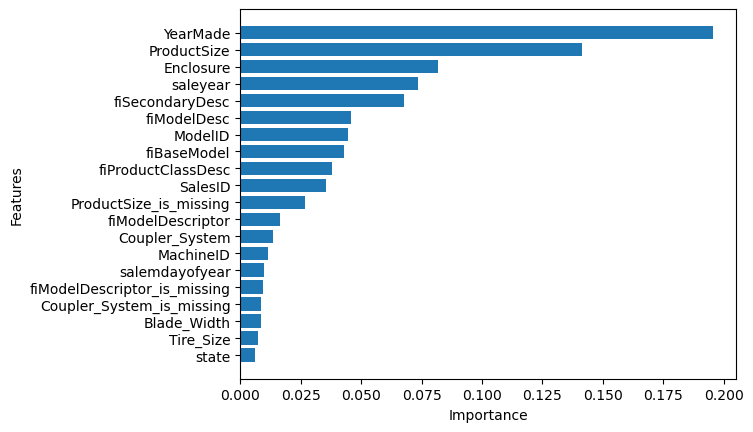

In [56]:
plot_features(Xtrain.columns,mega_model.feature_importances_)

In [52]:
df.YearMade.value_counts()

YearMade
1000    39391
2005    22096
1998    21751
2004    20914
1999    19274
        ...  
2012        1
1949        1
1942        1
2013        1
1937        1
Name: count, Length: 73, dtype: int64

In [58]:
import joblib
joblib.dump(mega_model, filename="Bulldozer_Price_detection_Model.joblib")

['Bulldozer_Price_detection_Model.joblib']